In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os


PATH = 'results_50'
df_cultura = pd.read_csv(PATH + "/raw_results.csv", index_col = [0])
df_cultura['N_est'] = df_cultura['f0'] + df_cultura['f1'] + df_cultura['f2']# plus the individual
df_cultura = df_cultura.groupby(['region_name', 'decade']).agg({'N_est': 'sum', 'individual_wikidata_id':'count'}).reset_index()
df_cultura = df_cultura.rename(columns={"individual_wikidata_id": "score"})

df_cultura['survival_ratio']=df_cultura['score']/df_cultura['N_est']

df_gdp_pop = pd.read_csv("../gdp_analysis/results/gdp_weighted_pop_fifty.csv")
df_gdp_pop = df_gdp_pop.rename(columns={"region": "region_name"})
df_gdp_pop = df_gdp_pop[df_gdp_pop['decade'] <= 1850]


### Unique plot

In [26]:
df_gdp_pop

,region_name,decade,gdp_pc_weighted,pop
0,Arabic world,1000,1056.285714,3500.000000
1,Arabic world,1100,1060.638037,3260.000000
2,Arabic world,1300,1020.000000,4420.000000
3,Arabic world,1400,1164.000000,4200.000000
4,Arabic world,1500,1084.000000,4000.000000
...,...,...,...,...
169,United Kingdom,1650,1703.163265,7367.500000
170,United Kingdom,1700,2347.196078,9085.424837
171,United Kingdom,1750,2725.367347,13845.833333
172,United Kingdom,1800,3179.745098,19182.073529


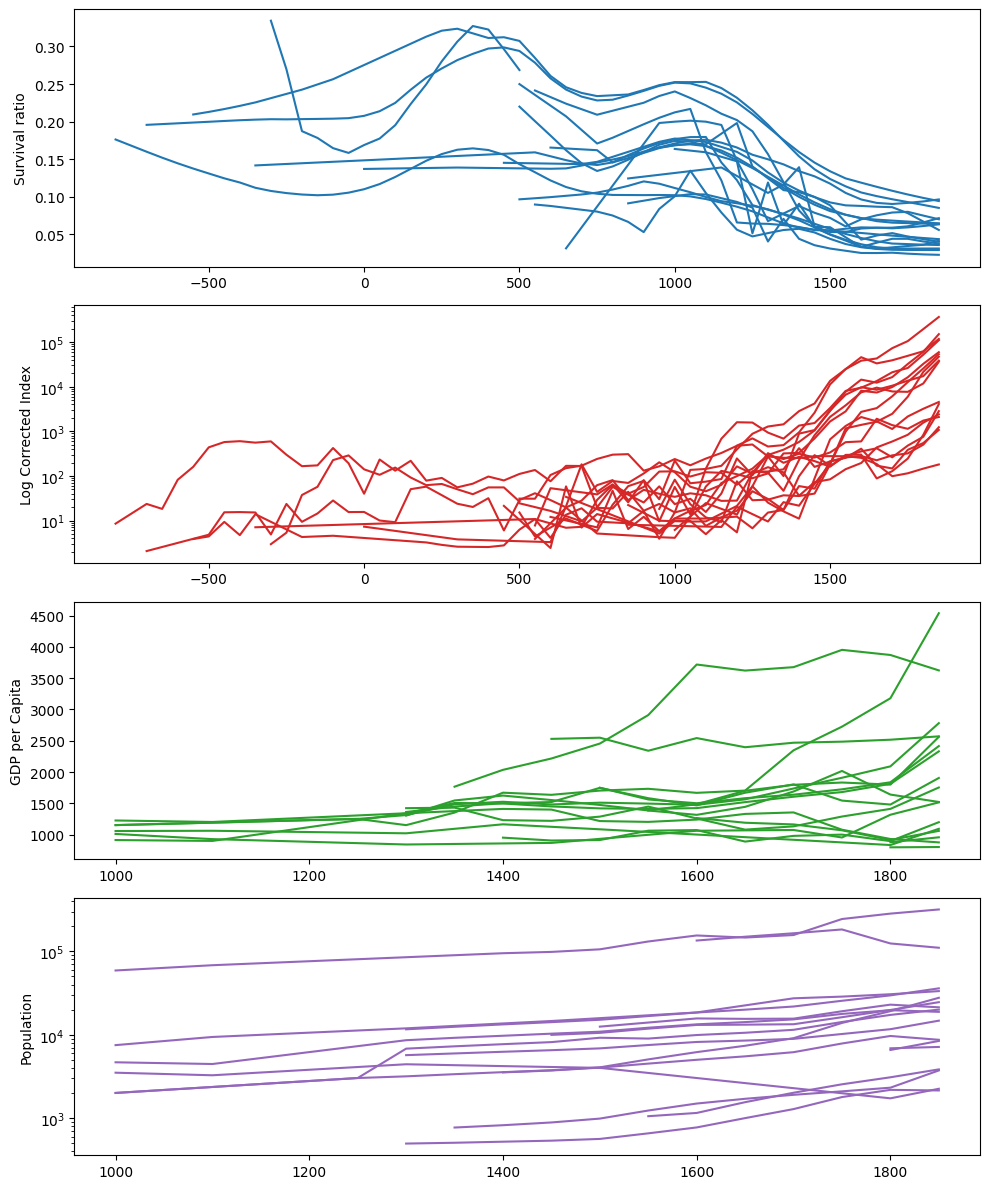

In [31]:
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Grouping by region_name
grouped_cultura = df_cultura.groupby('region_name')
grouped_gdp_pop = df_gdp_pop.groupby('region_name')

# Creating a figure and axis with three subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12))

# Plotting for each group in df_cultura
for name, group in grouped_cultura:
    # Calculating LOESS curve
    smoothed = lowess(group['survival_ratio'], group['decade'], frac=0.3)

    # Plotting survival ratio on the left y-axis
    color = 'tab:blue'
    ax1.plot(group['decade'], smoothed[:, 1], color=color)

    # Plotting N_est on the right y-axis
    color = 'tab:red'
    ax2.plot(group['decade'], group['N_est'], color=color)
    ax2.set_yscale('log')

# Plotting GDP per capita and population from df_gdp_pop
for name, group in grouped_gdp_pop:
    # Plotting GDP per capita on the left y-axis

    color = 'tab:green'
    ax3.plot(group['decade'], group['gdp_pc_weighted'], color=color)
    #ax3.set_yscale('log')

    # Plotting population on the right y-axis
    color = 'tab:purple'
    ax4.plot(group['decade'], group['pop'], color=color)
    ax4.set_yscale('log')

# Setting labels for the first subplot
#ax1.set_xlabel('Decade')
ax1.set_ylabel('Survival ratio')

# Setting labels for the second subplot
#ax2.set_xlabel('Decade')
ax2.set_ylabel('Log Corrected Index')

# Setting labels for the third subplot
#ax3.set_xlabel('Decade')
ax3.set_ylabel('GDP per Capita')

ax4.set_ylabel('Population')


# Adjust layout
plt.tight_layout()

# Displaying the plot
plt.show()


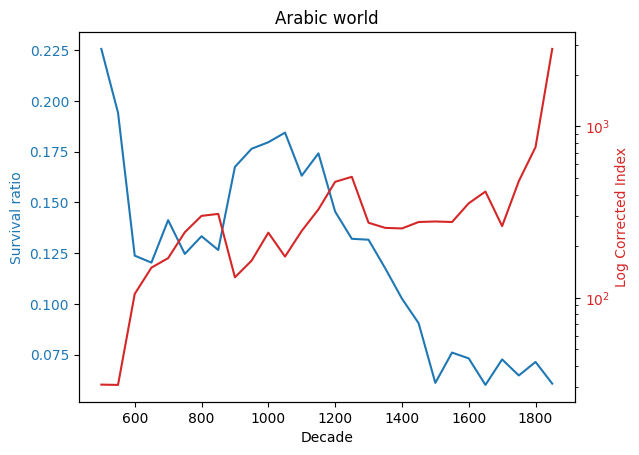

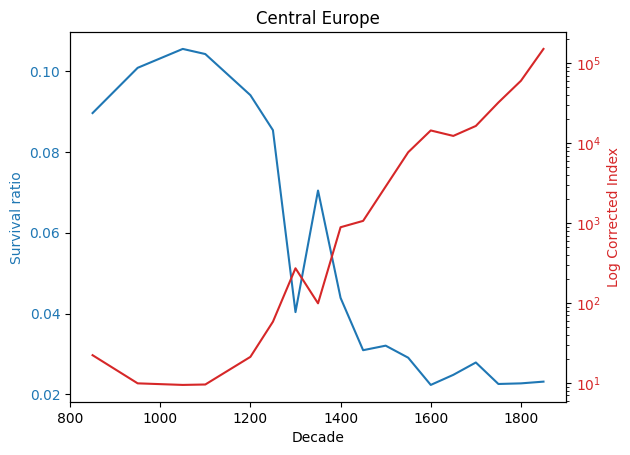

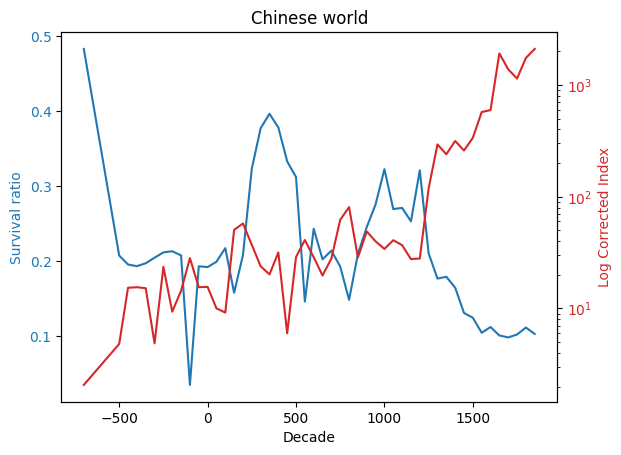

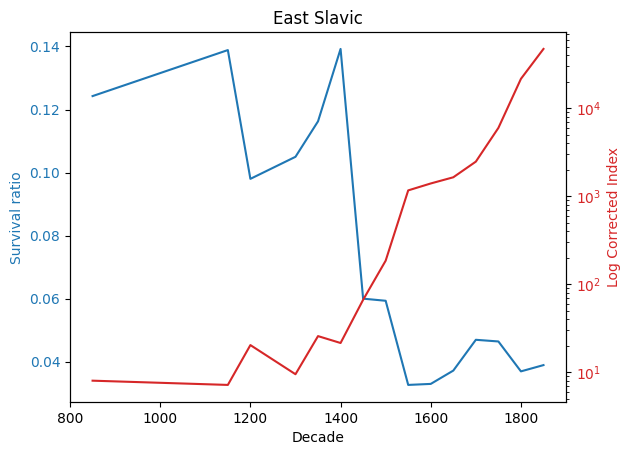

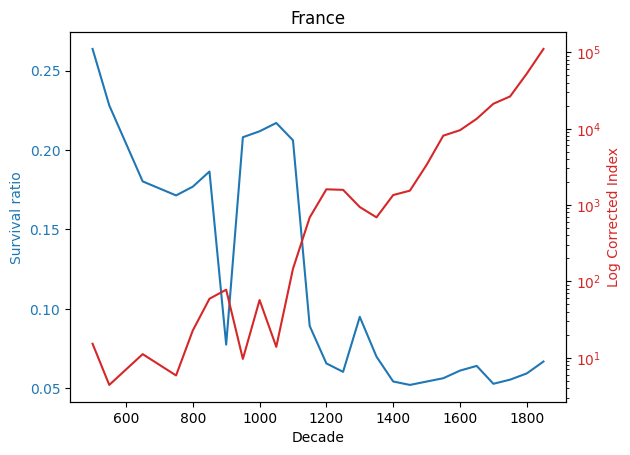

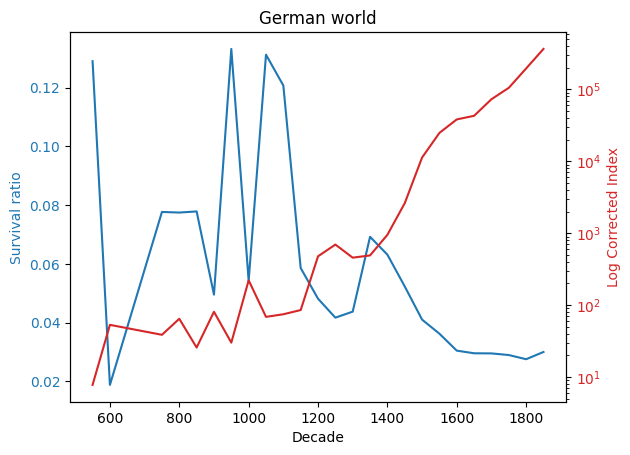

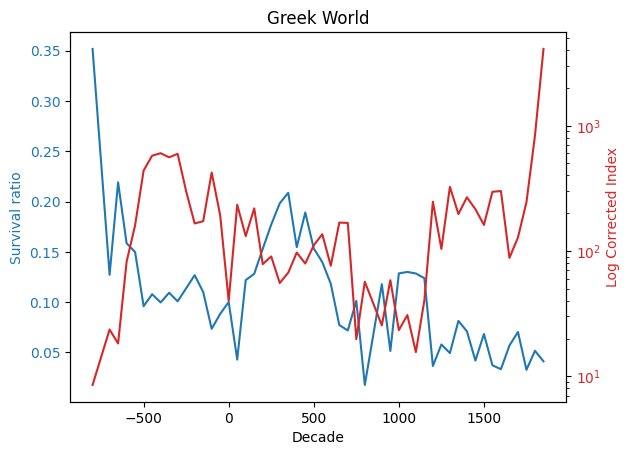

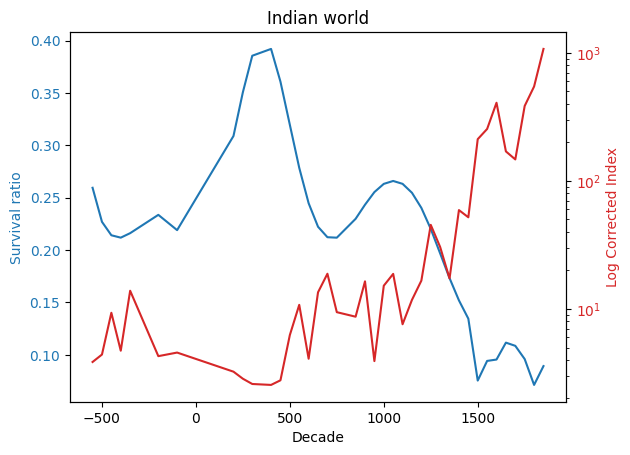

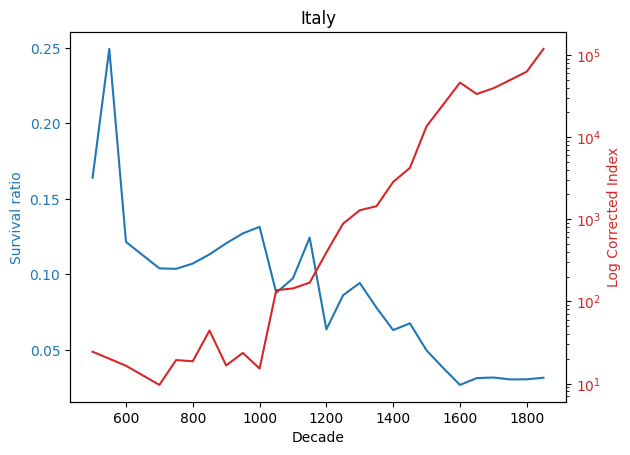

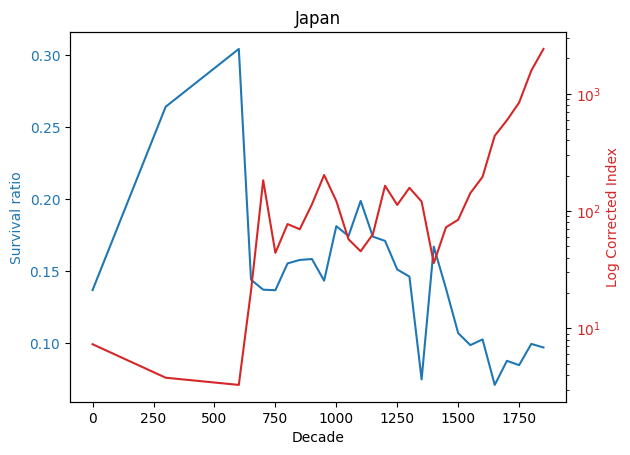

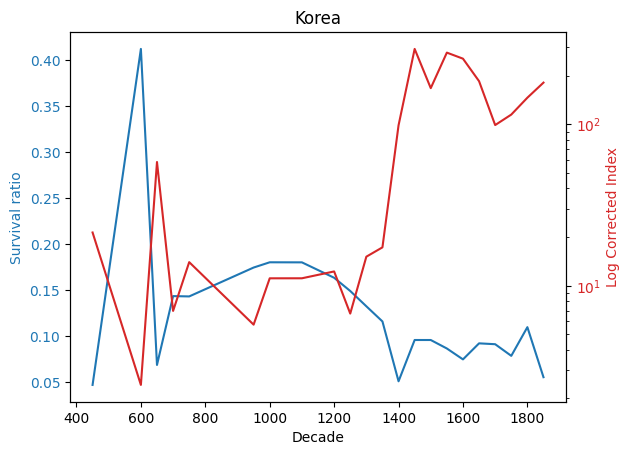

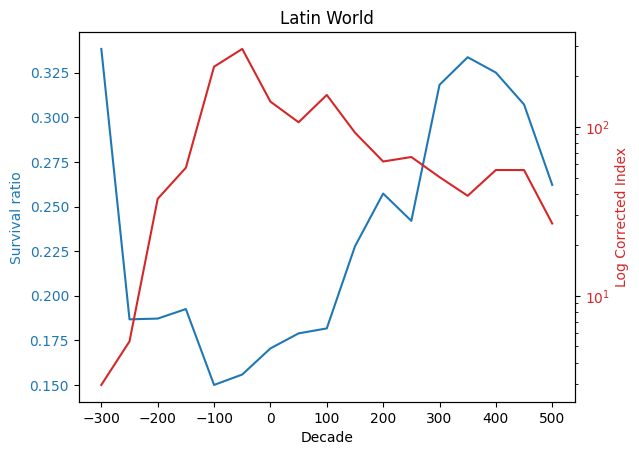

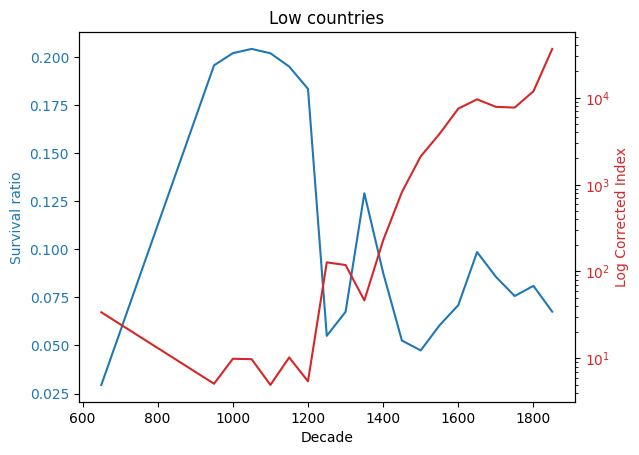

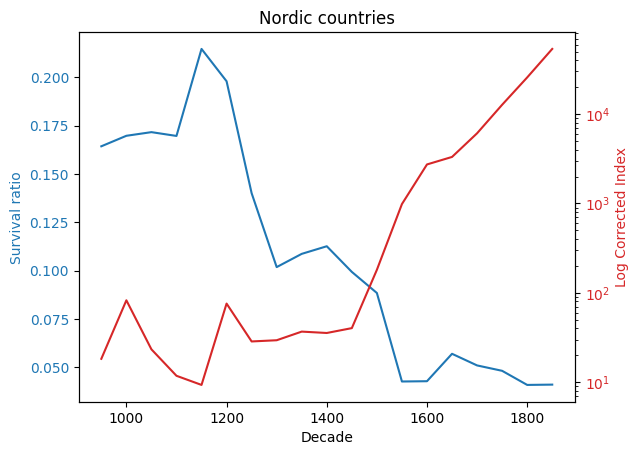

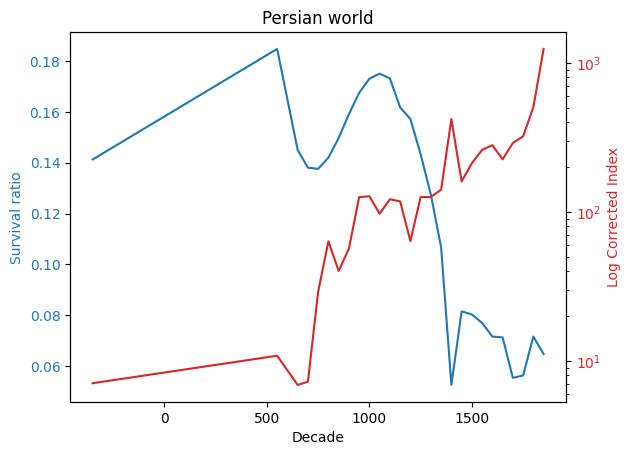

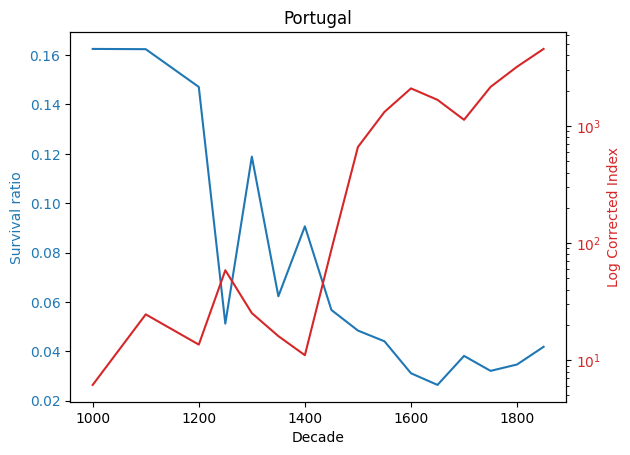

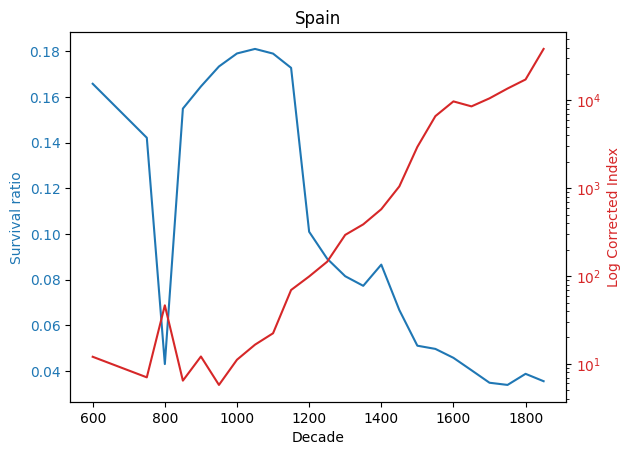

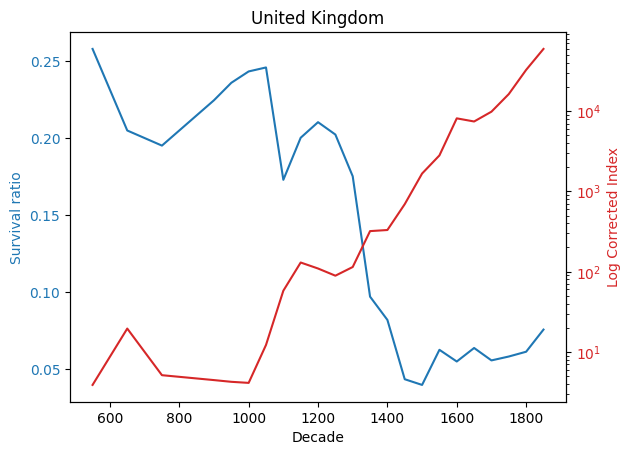

In [5]:

show = True

# Create the directory if it doesn't exist
directory = "survival_ratio_plots"
if not os.path.exists(directory):
    os.makedirs(directory)
    

grouped = df_cultura.groupby('region_name')

for name, group in grouped:
    fig, ax1 = plt.subplots()  # Create a figure and an axis

    # Plotting the survival ratio on the left y-axis
    color = 'tab:blue'
    ax1.set_xlabel('Decade')
    ax1.set_ylabel('Survival ratio', color=color)
    ax1.plot(group['decade'], group['survival_ratio'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis for the corrected index
    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
    color = 'tab:red'
    ax2.set_ylabel('Log Corrected Index', color=color)  # We already handled the x-label with ax1
    ax2.plot(group['decade'], group['N_est'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_yscale('log')

    plt.title(name)

    # Save the plot to a file
    plt.savefig(os.path.join(directory, f'{name}.png'))
    # Show plot
    if show:
        plt.show()
    plt.close(fig)  #